In [1]:
import json
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
results = [json.load(open(f)) for f in glob.glob('2020*/filesizes_[1-9]*.json')]

In [15]:
# sums of all
'{:,}'.format(sum(sum(r['filesizes'].values()) for r in results))

'27,687,104,937'

In [16]:
results[0].keys()

dict_keys(['elapsed', 'filesizes', 'quality'])

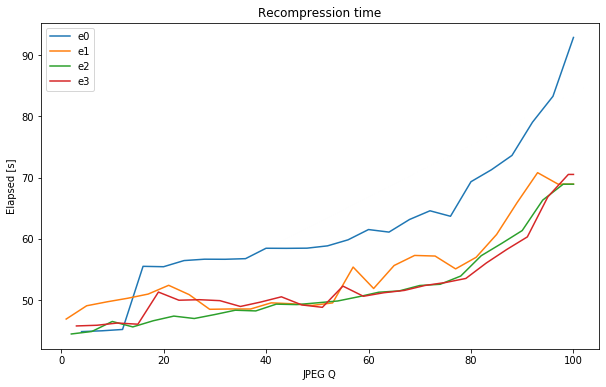

In [17]:
res = pd.Series({r['quality']: r['elapsed'] for r in results}).to_frame(name='elapsed').sort_index()
res['batch'] = res.index % 4
for b in range(4):
    res[f'e{b}'] = np.nan
    res.loc[res.batch == b, f'e{b}'] = res.elapsed
    res[f'e{b}'] = res[f'e{b}'].interpolate()
del res['batch']
del res['elapsed'] # noisy
res.plot()
plt.title('Recompression time')
plt.ylabel('Elapsed [s]')
plt.xlabel('JPEG Q')
pass

In [20]:
df = pd.Series(
    {r['quality']: sum(r['filesizes'].values()) for r in results}, 
    name='sum_filesizes'
).sort_index().to_frame()
df.index.name = 'Q'
df.tail()

,sum_filesizes
Q,
96,855446224
97,913586909
98,958927871
99,1076852314
100,1287375904


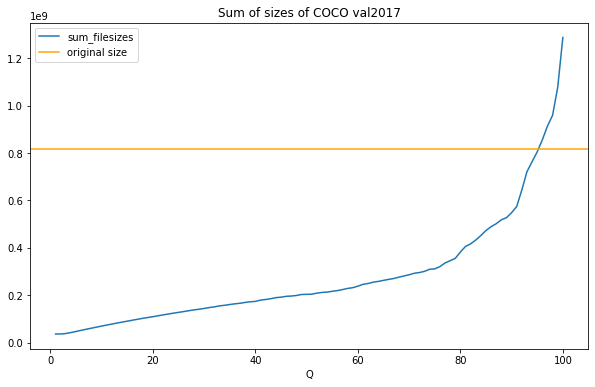

In [27]:
plot = df.plot()
# plot.get_figure().canvas.get_supported_filetypes()
originals = [json.load(open(f)) for f in glob.glob('2020*/filesizes_original.json')]
original_size = sum(originals[0]['filesizes'].values())
plt.gca().axhline(original_size, label='original size', color='orange')
plt.title('Sum of sizes of COCO val2017')
plt.legend()

In [28]:
fig = plot.get_figure()
fig.set_size_inches(3, 2)
fig.savefig('filesizes.pdf')